# Project: TMDB Movies Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

TMDB Movies dataset provides a lot of useful data for over 10,000 movies. Each row corresponds to a movie and its data. Some of the data which we will be working with includes:
    
    - keywords
    - runtime
    - genres
    - vote_average
    - release_year
    
For our analysis, we will answer a few questions like;

    - Do long movies receive better ratings?
    - How many movies with a rating of 8.0 or higher were released each decade?
    - What are the most popular keywords?
    - What are the most popular genres?
    
Throughout our analysis vote_average is the dependent variable while runtime, release_year, keywords, and genres are the independent variables.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

First let's import out tmdb-movies dataset and view a sample.

In [23]:
# import the dataset
df = pd.read_csv('tmdb-movies.csv')

# view a sample of the dataset
df.sample(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3557,101173,tt1372686,0.597001,7700000,1072602,Coriolanus,Gerard Butler|Ralph Fiennes|Lubna Azabal|Ashra...,NaN,Ralph Fiennes,Nature teaches beasts to know their friends.,...,"Caius Martius, aka Coriolanus, is an arrogant ...",123,Drama|Thriller,BBC Films|Synchronistic Pictures|Icon Entertai...,2/14/11,76,5.7,2011,7.464365e+06,1.039778e+06
3340,13359,tt1091617,0.021371,3500000,7700000,Expelled: No Intelligence Allowed,Ben Stein|Richard Dawkins|William Dembski|Paul...,http://www.expelledthemovie.com/,Nathan Frankowski,Big science has expelled smart new ideas from ...,...,"Hosted by Ben Stein, this controversial docume...",90,Documentary,Premise Media Corporation,4/18/08,12,4.5,2008,3.544753e+06,7.798457e+06
6877,19955,tt0478724,0.177457,0,0,PrÃªte-moi ta main,Alain Chabat|Bernadette Lafont|Charlotte Gains...,NaN,Eric Lartigau,NaN,...,"Life is easy for 43-year-old Luis, a happy sin...",90,Comedy|Romance,NaN,11/1/06,56,6.6,2006,0.000000e+00,0.000000e+00
3656,76122,tt2011118,0.378240,500000,0,Marvel One-Shot: The Consultant,Clark Gregg|Maximiliano HernÃ¡ndez|Tim Roth|Ro...,NaN,Leythum,NaN,...,Agent Coulson informs Agent Sitwell that the W...,4,Adventure|Fantasy|Science Fiction|Action,Marvel Studios,9/12/11,66,6.7,2011,4.846990e+05,0.000000e+00
8292,14002,tt0103767,0.521669,4000000,0,Baraka,NaN,http://en.wikipedia.org/wiki/Baraka_(film),Ron Fricke,A world beyond words.,...,This is a paralyzingly beautiful documentary w...,96,Documentary,Magidson Films,9/15/92,89,7.6,1992,6.216097e+06,0.000000e+00


Now we will explore our dataset by checking the data type for each column, which columns have null values and duplicate rows.

In [24]:
# view columns' names, the data type for each column and which columns have null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [25]:
# check the number of duplicates
df.duplicated().sum()

1

### Data Cleaning

Now let's clean our data to make it suitable for data analysis. Here are the steps we will take:

    1- Remove duplicate row
    2- Limit our data to only the columns we need
    3- Deal with illogical values
    4- Remove null values for keywords and genres columns when we answer questions related to them

In [26]:
# remove duplicate row
df = df.drop_duplicates()

# remove extra columns
df = df[['vote_average', 'release_year', 'runtime', 'genres', 'keywords']]

# explore the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   vote_average  10865 non-null  float64
 1   release_year  10865 non-null  int64  
 2   runtime       10865 non-null  int64  
 3   genres        10842 non-null  object 
 4   keywords      9372 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 509.3+ KB


In [27]:
# check for illogical values
df.describe()

,vote_average,release_year,runtime
count,10865.000000,10865.000000,10865.000000
mean,5.975012,2001.321859,102.071790
std,0.935138,12.813260,31.382701
min,1.500000,1960.000000,0.000000
25%,5.400000,1995.000000,90.000000
50%,6.000000,2006.000000,99.000000
75%,6.600000,2011.000000,111.000000
max,9.200000,2015.000000,900.000000


We can see that our data is fine except for runtime. There is at least one movie with runtime value of zero which is illogical. There are also at least one movie that is 900 minutes long. Let's explore runtime column more and figure out how to deal with these illogical values. First we will check the number of movies with a runtime of zero.

In [28]:
# check the number of movies with a runtime of zero
df.query('runtime == 0').count()

vote_average    31
release_year    31
runtime         31
genres          30
keywords        15
dtype: int64

Looks like there are only 31 movies with zero runtime. I think its fine to remove them. Now we will create a new data frame called df_runtime excluding those values.

In [29]:
# remove the movies with a runtime of zero since there are only few of them
df_runtime = df.query('runtime != 0')

Now for movies with very high durations. Since its highly unlikely for movies to exceed 4 hours, we will exclude movies with higher durations from our df_runtime data frame as they are likely television mini-series.

In [30]:
# remove movies more than 4 hours long
df_runtime = df_runtime.query('runtime <= 240')

For questions related to keywords and genres, we will create df_keywords and df_genres data frames respectively where we will remove null values.

In [31]:
df_keywords = df[df['keywords'].notna()]
df_genres = df[df['genres'].notna()]

<a id='eda'></a>
## Exploratory Data Analysis

### Do long movies receive better ratings?

To answer this question let's explore the correlation between ratings and runtime using scatter plot.

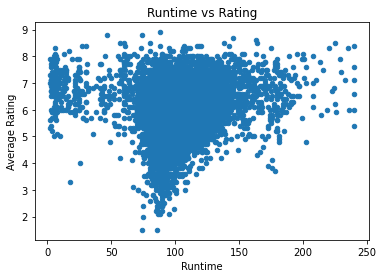

In [32]:
# explore the correlation between ratings and runtime using scatter plot
df_runtime.plot(x='runtime', y='vote_average', kind='scatter', title='Runtime vs Rating', \
                xlabel='Runtime', ylabel='Average Rating');

Seems like we can not come to a conclusion using scatter plot. Let's try grouping movies by runtime and viewing the mean rating for each group.

In [33]:
# grouping movies by runtime
df_runtime['runtime_grouped'] = pd.cut(df_runtime['runtime'], list(range(0,270,30)), \
                                       labels=[str(x-30)+'-'+str(x) for x in list(range(30,270,30))])

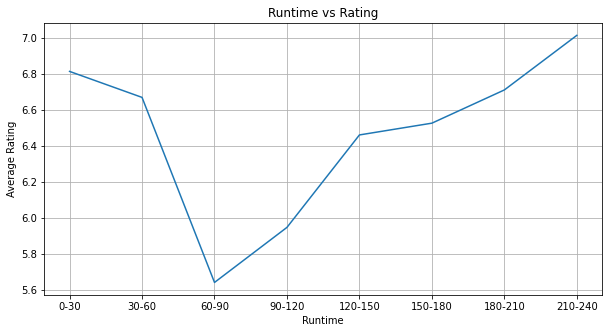

In [34]:
# explore the correlation between ratings and runtime using line chart
df_runtime.groupby('runtime_grouped')['vote_average'].mean().plot(xlabel='Runtime', ylabel='Average Rating', \
                                                                  grid=True, figsize=(10,5), title='Runtime vs Rating');

> Excluding short movies (less than 90 minutes), it seems as the duration of the movie increases, the rating increases too for this dataset although we can not say there is a correlation between them.

### How many movies with a rating of 8.0 or higher were released each decade?

To find out how the movie industry has evolved through the last 50 years, in terms of movie ratings, we will do the following:

    1- Create a new filtered data frame containing only the movies with vote_average of 8.0 or higher
    2- Group movies by decade
    3- Explore the correlation between the number of highly reated movies and release date using line chart

In [35]:
# create a new dataset for movies with a rating of 8.0 or higher
df_highly_rated = df.query('vote_average >= 8.0')

# grouping movies by decade
df_highly_rated['release_grouped'] = pd.cut(df_highly_rated['release_year'], list(range(1959,2029,10)), \
                                            labels=[str(x)[2:]+'\'s' for x in list(range(1960,2020,10))])

<ipython-input-35-9a6a7bacdf06>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_highly_rated['release_grouped'] = pd.cut(df_highly_rated['release_year'], list(range(1959,2029,10)), \


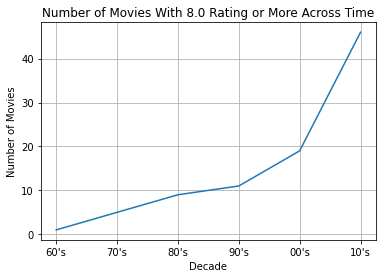

In [36]:
# explore the correlation between the number of highly rated movies and release date using line chart
df_highly_rated.groupby('release_grouped')['vote_average'].count().plot(xlabel='Decade', ylabel='Number of Movies', grid=True, \
                                                        title='Number of Movies With 8.0 Rating or More Across Time', legend=False);

> It seems that for this dataset, the number of highly rated movies increases with time.

### What are the most popular keywords?

To answer this question, we will create a function that return the number of occurrences of each keyword for all movies. We will use this function again to answer the next question.

In [37]:
def count_words(df_column):
    # count the occurrence of each word for movies with only one keyword
    word_occurrence = df_column[df_column.str.find('|') == -1].value_counts()
    # work with the rest of the movies with more than one keyword
    df_remaining = df_column.str.extractall(r'(.*)(\|)(.*)')
    while df_remaining.shape[0] > 0:
        word_occurrence = word_occurrence.add(df_remaining.iloc[:,2].value_counts(), fill_value=0)
        word_occurrence = word_occurrence.add(df_remaining.iloc[:,0][df_remaining.iloc[:,0].str.find('|') == -1].value_counts(), fill_value=0)
        df_remaining = df_remaining.iloc[:,0].str.extractall(r'(.*)(\|)(.*)')
    word_occurrence = word_occurrence.add(df_remaining.iloc[:,0].value_counts(), fill_value=0)
    return word_occurrence

In [38]:
count_words(df_keywords['keywords']).sort_values(ascending=False)

woman director          413.0
independent film        396.0
based on novel          278.0
sex                     272.0
sport                   216.0
                        ...  
immolation                1.0
immigrant experience      1.0
imaginary                 1.0
illiteracy                1.0
í•˜ìš¸ë§                  1.0
Length: 7878, dtype: float64

> It looks like woman director, independent films, and based on novel are the most popular keywords.

### What are the most popular genres?

In [39]:
count_words(df_genres['genres']).sort_values(ascending=False)

Drama              4760.0
Comedy             3793.0
Thriller           2907.0
Action             2384.0
Romance            1712.0
Horror             1637.0
Adventure          1471.0
Crime              1354.0
Family             1231.0
Science Fiction    1229.0
Fantasy             916.0
Mystery             810.0
Animation           699.0
Documentary         520.0
Music               408.0
History             334.0
War                 270.0
Foreign             188.0
TV Movie            167.0
Western             165.0
dtype: float64

> Regarding genres; drama, comedy, and thriller are the most popular genres.

<a id='conclusions'></a>
## Conclusions

> In our first section, we found that movies with long runtime have better ratings than those with short runtime excluding movies with runtime of 90 minuter or less. Then we discovered that the movie industry has developed a lot through time especially in the last ten years regarding the quality of movies. Lastly, we found out that the most popular keywords are woman director, independent films, and based on novel while the most popular genres are drama, comedy, and thriller.

### Limitation:

    1- Our analysis is limited to only about 11,000 movies over just the last 60 years
    2- Dropping null values especially for the keywords column may have skewed our data
    3- Removing movies with runtime of more than 4 hours may have affected our analysis for the correlation between vote_average and runtime